### aim: 

### date: 

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [3]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [4]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

In [64]:
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)


def make_boe_summary_graph_one_ssp_slide(output_str, fnam_str, tssp, valuedesc = '', save = False):
    
    ds = xr.open_dataset(output_str)
    #### ssps 1 and 3 figure
    fact = 1
    fig, axs = plt.subplots(5,3, figsize=(12*fact, 12*fact), facecolor='w', edgecolor='k')
    axs = axs.ravel()
    tw = 0.4; lowsigalpha = 0.45; tlw = 2; lowsiglw = 0
    
    seasonar = ['FY','FY','FY',\
                'DJF','DJF','DJF',\
                'MAM', 'MAM', 'MAM',\
                'JJA','JJA','JJA',\
                'SON','SON','SON']
    periodar = ['1950-2000','2000-2050','2050-2100']
    for i in range(0,15):

        per = i%3
        p = periodar[per]
        s = seasonar[i]
        fs = ['ghg','ozone',];
        scs = [tssp,tssp]
        inds = [0.4,2.4]#,5.45,7.95]
        for x in range(2):
            
            f = fs[x]; sc = scs[x]; ind = inds[x]
            
            CO2_SST = ds.trend.loc[{'period':p, 'season':s, 'quantity': 'CO2_SST', \
                          'forcing': f, 'scenario': sc }]

            CO2_OT_phys_chem = ds.trend.loc[{'period':p, 'season':s, 'quantity': 'CO2_OT_phys_chem', \
                          'forcing': f, 'scenario': sc }] 

            CO2_MLD_phys_chem = ds.trend.loc[{'period':p, 'season':s, 'quantity': 'CO2_MLD_phys_chem', \
                          'forcing': f, 'scenario': sc }] 

            CO2_MLD_bio = ds.trend.loc[{'period':p, 'season':s, 'quantity': 'CO2_MLD_bio', \
                          'forcing': f, 'scenario': sc }] 

            CO2_OT_bio = ds.trend.loc[{'period':p, 'season':s, 'quantity': 'CO2_OT_bio', \
                          'forcing': f, 'scenario': sc }]

            CO2_tot = ds.trend.loc[{'period':p, 'season':s, 'quantity': 'CO2_tot', \
                          'forcing': f, 'scenario': sc }] 
            
            ##### significances
            CO2_SST_sig = ds.sig.loc[{'period':p, 'season':s, 'quantity': 'CO2_SST', \
                          'forcing': f, 'scenario': sc }]

            CO2_OT_phys_chem_sig = ds.sig.loc[{'period':p, 'season':s, 'quantity': 'CO2_OT_phys_chem', \
                          'forcing': f, 'scenario': sc }] 

            CO2_MLD_phys_chem_sig = ds.sig.loc[{'period':p, 'season':s, 'quantity': 'CO2_MLD_phys_chem', \
                          'forcing': f, 'scenario': sc }] 

            CO2_MLD_bio_sig = ds.sig.loc[{'period':p, 'season':s, 'quantity': 'CO2_MLD_bio', \
                          'forcing': f, 'scenario': sc }] 

            CO2_OT_bio_sig = ds.sig.loc[{'period':p, 'season':s, 'quantity': 'CO2_OT_bio', \
                          'forcing': f, 'scenario': sc }]

            CO2_tot_sig = ds.sig.loc[{'period':p, 'season':s, 'quantity': 'CO2_tot', \
                          'forcing': f, 'scenario': sc }] 
            
            CO2_SST_alpha = 1; CO2_OT_phys_chem_alpha = 1
            CO2_MLD_phys_chem_alpha = 1; CO2_MLD_bio_alpha = 1
            CO2_OT_bio_alpha = 1; CO2_tot_alpha = 1; CO2_bio_alpha = 1
            
            CO2_SST_lw = tlw; CO2_OT_phys_chem_lw = tlw
            CO2_MLD_phys_chem_lw = tlw; CO2_MLD_bio_lw = tlw
            CO2_OT_bio_lw = tlw; CO2_tot_lw = tlw; CO2_bio_lw = tlw
            
            
            if CO2_SST_sig == 0: CO2_SST_alpha = lowsigalpha
            if CO2_OT_phys_chem_sig == 0: CO2_OT_phys_chem_alpha = lowsigalpha
            if CO2_MLD_phys_chem_sig == 0: CO2_MLD_phys_chem_alpha = lowsigalpha
            if ((CO2_MLD_bio_sig == 0) | (CO2_OT_bio_sig == 0)) : CO2_bio_alpha = lowsigalpha
            if CO2_OT_bio_sig == 0: CO2_OT_bio_alpha = lowsigalpha
            if CO2_tot_sig == 0: CO2_tot_alpha = lowsigalpha
                
            if CO2_SST_sig == 0: CO2_SST_lw = lowsiglw
            if CO2_OT_phys_chem_sig == 0: CO2_OT_phys_chem_lw = lowsiglw
            if CO2_MLD_phys_chem_sig == 0: CO2_MLD_phys_chem_lw = lowsiglw
            if ((CO2_MLD_bio_sig == 0) | (CO2_OT_bio_sig == 0)) : CO2_bio_lw = lowsiglw
            if CO2_OT_bio_sig == 0: CO2_OT_bio_lw = lowsiglw
            if CO2_tot_sig == 0: CO2_tot_lw = lowsiglw
            
            ms = 7
            if ind == inds[0]:
#                 axs[i].bar(ind,CO2_tot,width = tw, color = 'k', alpha = CO2_tot_alpha,\
#                            edgecolor = 'k', lw = CO2_tot_lw, label = 'Total $\Delta$ CO2flux')
                
                axs[i].bar(ind+tw*1,CO2_SST,width = tw, color = 'b', alpha = CO2_SST_alpha,\
                            edgecolor = 'k', lw = CO2_SST_lw, label = '$\Delta$ CO2flux due to $\Delta$ SST')
                
                axs[i].bar(ind,CO2_OT_phys_chem,width = tw, color = 'r', alpha = CO2_OT_phys_chem_alpha,\
                        edgecolor = 'k', lw = CO2_OT_phys_chem_lw, 
                        label = '$\Delta$ CO2flux due to $\Delta$ OT \n (combined phys.-chem. effects)') 
                
                axs[i].bar(ind+tw*2,CO2_MLD_phys_chem,width = tw, color = 'y', alpha = CO2_MLD_phys_chem_alpha, \
                        edgecolor = 'k', lw = CO2_MLD_phys_chem_lw,
                        label = '$\Delta$ CO2flux due to $\Delta$ MLD \n (combined phys.-chem. effects)')   
                
                axs[i].bar(ind+tw*3,CO2_MLD_bio+CO2_OT_bio,width = tw, color = 'green', alpha = CO2_bio_alpha, \
                        edgecolor = 'k', lw = CO2_bio_lw,
                        label = '$\Delta$ CO2flux due to \n $\Delta$MLD+$\Delta$OT change \n (ecosystem effects)')  
                
                axs[i].axvline(x = 2, linestyle = '--', linewidth = 1, color = 'k', alpha = 0.7)

            else:
#                 axs[i].bar(ind,CO2_tot,width = tw, color = 'k', alpha = CO2_tot_alpha,\
#                           edgecolor = 'k', lw = CO2_tot_lw)
                
                axs[i].bar(ind+tw,CO2_SST,width = tw, color = 'b', alpha = CO2_SST_alpha,\
                          edgecolor = 'k', lw = CO2_SST_lw)
                
                axs[i].bar(ind,CO2_OT_phys_chem,width = tw, color = 'r', alpha = CO2_OT_phys_chem_alpha,\
                          edgecolor = 'k', lw = CO2_OT_phys_chem_lw, )
                
                axs[i].bar(ind+tw*2,CO2_MLD_phys_chem,width = tw, color = 'y', alpha = CO2_MLD_phys_chem_alpha,\
                          edgecolor = 'k', lw = CO2_MLD_phys_chem_lw,)
                
                axs[i].bar(ind+tw*3,CO2_MLD_bio+CO2_OT_bio,width = tw, color = 'green', alpha = CO2_bio_alpha,\
                          edgecolor = 'k', lw = CO2_bio_lw,)  
                
#                 axs[i].axvline(x = 5, linestyle = ':', linewidth = tw)
#                 axs[i].axvline(x = 5, linestyle = '-', linewidth = 2, color = 'grey')
#                 axs[i].axvline(x = 2.5, linestyle = '-', linewidth = 2, color = 'grey')
#                 axs[i].axvline(x = 7.5, linestyle = ':', linewidth = 0.9, color = 'grey')




        axs[i].set_xticks([1,3])
        axs[i].set_xlim([0,4])
        if i == 0:
            axs[i].set_xticklabels(['GHG effect','ozone effect'])
        if i != 0:
            axs[i].set_xticklabels(['',''])
        axs[i].set_title(f'{p} {s}')
        axs[0].set_ylabel('pgC yr$^{-1}$')
        axs[i].axhline(y=0, color = 'k')
        
        for i in range(0,15):
            t = 'z'
            if (i%3 == 0):
                t = 'a'
                axs[i].set_ylim([-0.3,0.3])
            if (i%3 == 1):
                axs[i].set_ylim([-0.2,0.5])
            if (i%3 == 2):
                t = 'c'    
                axs[i].set_ylim([-0.15,0.15])
                if tssp == 'ssp3':
                    axs[i].set_ylim([-0.15,2.2])
                
    fs = 13    
#     axs[0].text(2.6, 0.05, 'total', color = 'k', rotation = 0, fontsize = fs, fontweight = 'bold')
    axs[0].text(2.2, 0.08, 'OT', color = 'r', rotation = 0, fontsize = fs, fontweight = 'bold')
    axs[0].text(2.2+tw*1, -0.22, 'SST', color = 'b', rotation = 0, fontsize = fs, fontweight = 'bold')
    axs[0].text(2.2+tw*2, 0.2, 'MLD', color = 'y', rotation = 0, fontsize = fs, fontweight = 'bold')
    axs[0].text(2.2+tw*3, -0.1, 'ECO', color = 'g', rotation = 0, fontsize = fs, fontweight = 'bold')
    
    
    #axs[2].legend(bbox_to_anchor = [1,0.95], fontsize = 10)
    #plt.suptitle(f'Relative climate-driven contributions to CO2 flux, \n {tssp}, data source = {valuedesc}')
    plt.tight_layout()
    if save:
        print(f'saved figure at {fnam_str}')
        plt.savefig(fnam_str)
    



saved figure at ./figs/BOE-FIG-ssp1-bio-MEDUSA-fer-MEDUSA-cchem-MEDUSA-SF.jpg
saved figure at ./figs/BOE-FIG-ssp3-bio-MEDUSA-fer-MEDUSA-cchem-MEDUSA-SF.jpg


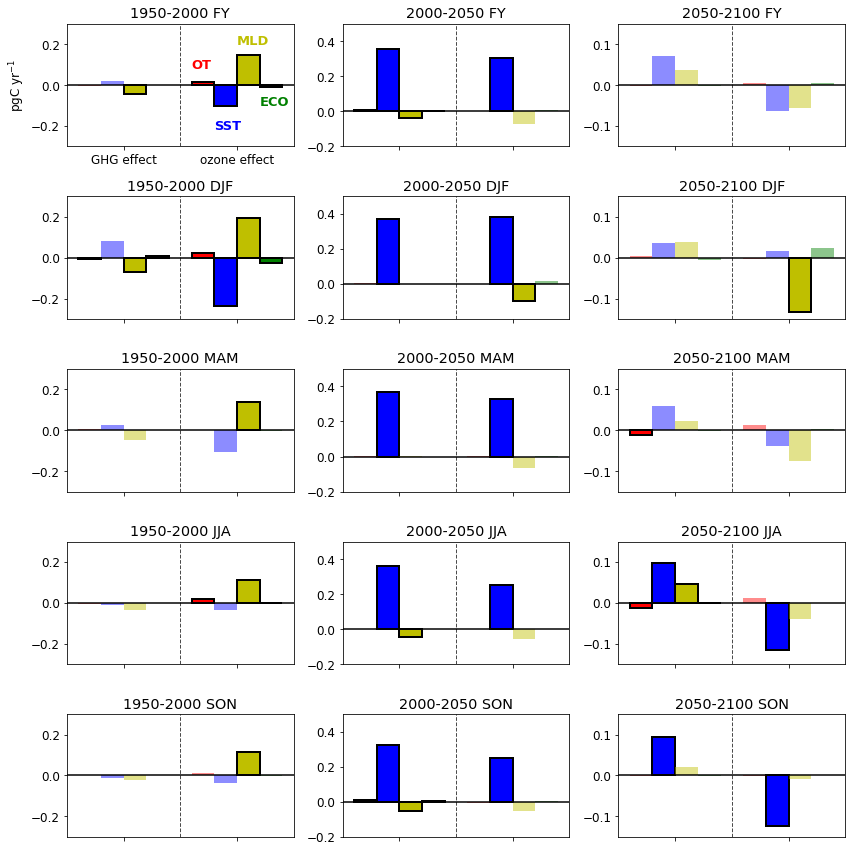

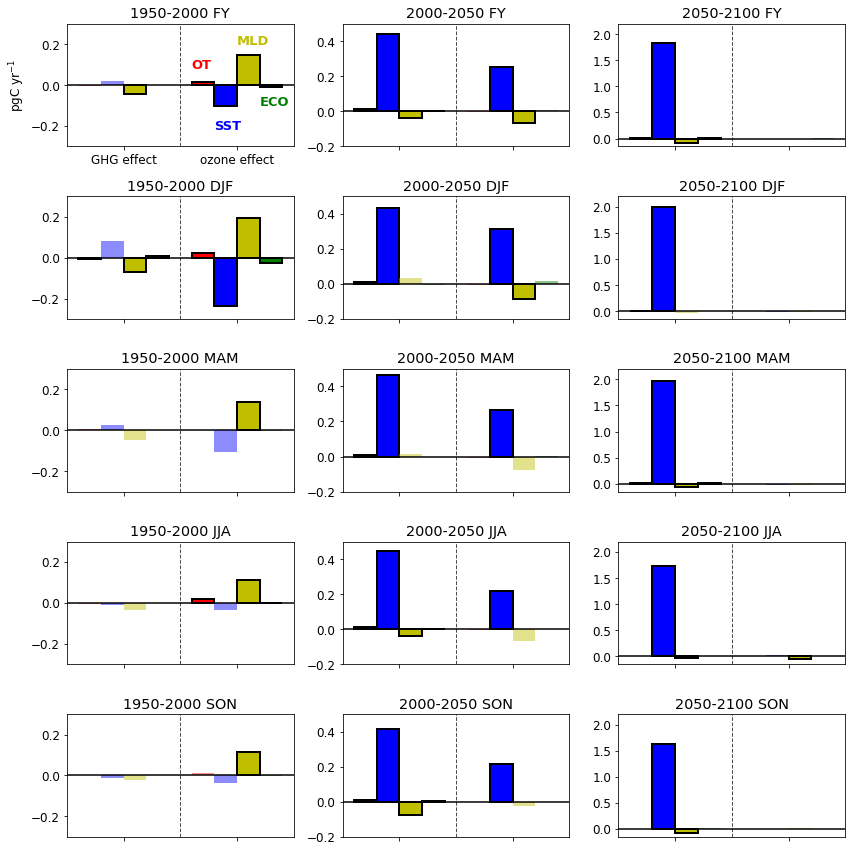

In [65]:
output_str = './data/BOE-OUTPUT-bio-MEDUSA-fer-MEDUSA-cchem-MEDUSA.nc'
valuedesc = 'biology, iron and kg parameterized, carbon data from MEDUSA'
tssp = 'ssp1'; 
fnam_str = f'./figs/BOE-FIG-{tssp}-bio-MEDUSA-fer-MEDUSA-cchem-MEDUSA-SF.jpg'
make_boe_summary_graph_one_ssp_slide(output_str, fnam_str, tssp, valuedesc, True)

tssp = 'ssp3'; 
fnam_str = f'./figs/BOE-FIG-{tssp}-bio-MEDUSA-fer-MEDUSA-cchem-MEDUSA-SF.jpg'
make_boe_summary_graph_one_ssp_slide(output_str, fnam_str, tssp, valuedesc, True)

####

# output_str = './data/BOE-OUTPUT-bio-MEDUSA-fer-GEOTRACES-cchem-MEDUSA.nc'
# valuedesc = 'biology, iron and kg parameterized, carbon data from MEDUSA'
# tssp = 'ssp1'; 
# fnam_str = f'./figs/BOE-FIG-{tssp}-bio-MEDUSA-fer-GEOTRACES-cchem-MEDUSA.jpg'
# make_boe_summary_graph_one_ssp_slide(output_str, fnam_str, tssp, valuedesc)

# tssp = 'ssp3'; 
# fnam_str = f'./figs/BOE-FIG-{tssp}-bio-MEDUSA-fer-GEOTRACES-cchem-MEDUSA.jpg'
# make_boe_summary_graph_one_ssp_slide(output_str, fnam_str, tssp, valuedesc)

# fnam_str = f'./figs/BOE-FIG-bothssp-medusamodel.jpg'
# make_boe_summary_graph_both_ssps(output_str, fnam_str, valuedesc)

## make combined ssp1 ssp3 scen

In [134]:
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)


def make_boe_summary_graph_bothssp_slide(output_str, fnam_str, tssp, valuedesc = '', save = False):
    
    ds = xr.open_dataset(output_str)
    #### ssps 1 and 3 figure
    fact = 1
    fig, axs = plt.subplots(4,3, figsize=(8*fact, 12/5*4*fact), facecolor='w', edgecolor='k')
    axs = axs.ravel()
    tw = 0.4; lowsigalpha = 0.45; tlw = 2; lowsiglw = 0
    
    seasonar = ['FY','FY','FY',\
                'DJF','DJF','DJF',\
                'MAM', 'MAM', 'MAM',\
                'JJA','JJA','JJA',\
                'SON','SON','SON']
    periodar = ['1950-2000','2000-2050','2050-2100']
    for i in range(0,6):

        per = i%3
        p = periodar[per]
        s = seasonar[i]
        fs = ['ghg','ozone',];
        scs = ['ssp1','ssp1']
        inds = [0.4,2.4]#,5.45,7.95]
        for x in range(2):
            
            f = fs[x]; sc = scs[x]; ind = inds[x]
            
            CO2_SST = ds.trend.loc[{'period':p, 'season':s, 'quantity': 'CO2_SST', \
                          'forcing': f, 'scenario': sc }]

            CO2_OT_phys_chem = ds.trend.loc[{'period':p, 'season':s, 'quantity': 'CO2_OT_phys_chem', \
                          'forcing': f, 'scenario': sc }] 

            CO2_MLD_phys_chem = ds.trend.loc[{'period':p, 'season':s, 'quantity': 'CO2_MLD_phys_chem', \
                          'forcing': f, 'scenario': sc }] 

            CO2_MLD_bio = ds.trend.loc[{'period':p, 'season':s, 'quantity': 'CO2_MLD_bio', \
                          'forcing': f, 'scenario': sc }] 

            CO2_OT_bio = ds.trend.loc[{'period':p, 'season':s, 'quantity': 'CO2_OT_bio', \
                          'forcing': f, 'scenario': sc }]

            CO2_tot = ds.trend.loc[{'period':p, 'season':s, 'quantity': 'CO2_tot', \
                          'forcing': f, 'scenario': sc }] 
            
            ##### significances
            CO2_SST_sig = ds.sig.loc[{'period':p, 'season':s, 'quantity': 'CO2_SST', \
                          'forcing': f, 'scenario': sc }]

            CO2_OT_phys_chem_sig = ds.sig.loc[{'period':p, 'season':s, 'quantity': 'CO2_OT_phys_chem', \
                          'forcing': f, 'scenario': sc }] 

            CO2_MLD_phys_chem_sig = ds.sig.loc[{'period':p, 'season':s, 'quantity': 'CO2_MLD_phys_chem', \
                          'forcing': f, 'scenario': sc }] 

            CO2_MLD_bio_sig = ds.sig.loc[{'period':p, 'season':s, 'quantity': 'CO2_MLD_bio', \
                          'forcing': f, 'scenario': sc }] 

            CO2_OT_bio_sig = ds.sig.loc[{'period':p, 'season':s, 'quantity': 'CO2_OT_bio', \
                          'forcing': f, 'scenario': sc }]

            CO2_tot_sig = ds.sig.loc[{'period':p, 'season':s, 'quantity': 'CO2_tot', \
                          'forcing': f, 'scenario': sc }] 
            
            CO2_SST_alpha = 1; CO2_OT_phys_chem_alpha = 1
            CO2_MLD_phys_chem_alpha = 1; CO2_MLD_bio_alpha = 1
            CO2_OT_bio_alpha = 1; CO2_tot_alpha = 1; CO2_bio_alpha = 1
            
            CO2_SST_lw = tlw; CO2_OT_phys_chem_lw = tlw
            CO2_MLD_phys_chem_lw = tlw; CO2_MLD_bio_lw = tlw
            CO2_OT_bio_lw = tlw; CO2_tot_lw = tlw; CO2_bio_lw = tlw
            
            
            if CO2_SST_sig == 0: CO2_SST_alpha = lowsigalpha
            if CO2_OT_phys_chem_sig == 0: CO2_OT_phys_chem_alpha = lowsigalpha
            if CO2_MLD_phys_chem_sig == 0: CO2_MLD_phys_chem_alpha = lowsigalpha
            if ((CO2_MLD_bio_sig == 0) | (CO2_OT_bio_sig == 0)) : CO2_bio_alpha = lowsigalpha
            if CO2_OT_bio_sig == 0: CO2_OT_bio_alpha = lowsigalpha
            if CO2_tot_sig == 0: CO2_tot_alpha = lowsigalpha
                
            if CO2_SST_sig == 0: CO2_SST_lw = lowsiglw
            if CO2_OT_phys_chem_sig == 0: CO2_OT_phys_chem_lw = lowsiglw
            if CO2_MLD_phys_chem_sig == 0: CO2_MLD_phys_chem_lw = lowsiglw
            if ((CO2_MLD_bio_sig == 0) | (CO2_OT_bio_sig == 0)) : CO2_bio_lw = lowsiglw
            if CO2_OT_bio_sig == 0: CO2_OT_bio_lw = lowsiglw
            if CO2_tot_sig == 0: CO2_tot_lw = lowsiglw
            
            ms = 7
            if ind == inds[0]:
#                 axs[i].bar(ind,CO2_tot,width = tw, color = 'k', alpha = CO2_tot_alpha,\
#                            edgecolor = 'k', lw = CO2_tot_lw, label = 'Total $\Delta$ CO2flux')
                
                axs[i].bar(ind+tw*1,CO2_SST,width = tw, color = 'b', alpha = CO2_SST_alpha,\
                            edgecolor = 'k', lw = CO2_SST_lw, label = '$\Delta$ CO2flux due to $\Delta$ SST')
                
                axs[i].bar(ind,CO2_OT_phys_chem,width = tw, color = 'r', alpha = CO2_OT_phys_chem_alpha,\
                        edgecolor = 'k', lw = CO2_OT_phys_chem_lw, 
                        label = '$\Delta$ CO2flux due to $\Delta$ OT \n (combined phys.-chem. effects)') 
                
                axs[i].bar(ind+tw*2,CO2_MLD_phys_chem,width = tw, color = 'y', alpha = CO2_MLD_phys_chem_alpha, \
                        edgecolor = 'k', lw = CO2_MLD_phys_chem_lw,
                        label = '$\Delta$ CO2flux due to $\Delta$ MLD \n (combined phys.-chem. effects)')   
                
                axs[i].bar(ind+tw*3,CO2_MLD_bio+CO2_OT_bio,width = tw, color = 'green', alpha = CO2_bio_alpha, \
                        edgecolor = 'k', lw = CO2_bio_lw,
                        label = '$\Delta$ CO2flux due to \n $\Delta$MLD+$\Delta$OT change \n (ecosystem effects)')  
                
                axs[i].axvline(x = 2, linestyle = '--', linewidth = 1, color = 'k', alpha = 0.7)

            else:
#                 axs[i].bar(ind,CO2_tot,width = tw, color = 'k', alpha = CO2_tot_alpha,\
#                           edgecolor = 'k', lw = CO2_tot_lw)
                
                axs[i].bar(ind+tw,CO2_SST,width = tw, color = 'b', alpha = CO2_SST_alpha,\
                          edgecolor = 'k', lw = CO2_SST_lw)
                
                axs[i].bar(ind,CO2_OT_phys_chem,width = tw, color = 'r', alpha = CO2_OT_phys_chem_alpha,\
                          edgecolor = 'k', lw = CO2_OT_phys_chem_lw, )
                
                axs[i].bar(ind+tw*2,CO2_MLD_phys_chem,width = tw, color = 'y', alpha = CO2_MLD_phys_chem_alpha,\
                          edgecolor = 'k', lw = CO2_MLD_phys_chem_lw,)
                
                axs[i].bar(ind+tw*3,CO2_MLD_bio+CO2_OT_bio,width = tw, color = 'green', alpha = CO2_bio_alpha,\
                          edgecolor = 'k', lw = CO2_bio_lw,)  
                

    
        axs[i].set_xticks([1,3])
        axs[i].set_xlim([0,4])
        if i == 0:
            axs[i].set_xticklabels(['GHG effect','ozone effect'])
            axs[i].tick_params(axis="x",direction="in", pad=-15)
        if i != 0:
            axs[i].set_xticklabels(['',''])
        axs[i].set_title(f'{p} {s}')
        axs[0].set_ylabel('pgC yr$^{-1}$')
        axs[i].axhline(y=0, color = 'k')
        
        
        
        for i in range(0,6):
            t = 'z'
            if (i%3 == 0):
                t = 'a'
                axs[i].set_ylim([-0.3,0.3])
            if (i%3 == 1):
                axs[i].set_ylim([-0.2,0.5])
            if (i%3 == 2):
                t = 'c'    
                axs[i].set_ylim([-0.15,0.15])
                if tssp == 'ssp3':
                    axs[i].set_ylim([-0.15,2.2])
        
        
    for i in range(0,6):

        per = i%3
        p = periodar[per]
        s = seasonar[i]
        fs = ['ghg','ozone',];
        scs = ['ssp3','ssp3']
        inds = [0.4,2.4]#,5.45,7.95]
        for x in range(2):
            
            f = fs[x]; sc = scs[x]; ind = inds[x]
            
            CO2_SST = ds.trend.loc[{'period':p, 'season':s, 'quantity': 'CO2_SST', \
                          'forcing': f, 'scenario': sc }]

            CO2_OT_phys_chem = ds.trend.loc[{'period':p, 'season':s, 'quantity': 'CO2_OT_phys_chem', \
                          'forcing': f, 'scenario': sc }] 

            CO2_MLD_phys_chem = ds.trend.loc[{'period':p, 'season':s, 'quantity': 'CO2_MLD_phys_chem', \
                          'forcing': f, 'scenario': sc }] 

            CO2_MLD_bio = ds.trend.loc[{'period':p, 'season':s, 'quantity': 'CO2_MLD_bio', \
                          'forcing': f, 'scenario': sc }] 

            CO2_OT_bio = ds.trend.loc[{'period':p, 'season':s, 'quantity': 'CO2_OT_bio', \
                          'forcing': f, 'scenario': sc }]

            CO2_tot = ds.trend.loc[{'period':p, 'season':s, 'quantity': 'CO2_tot', \
                          'forcing': f, 'scenario': sc }] 
            
            ##### significances
            CO2_SST_sig = ds.sig.loc[{'period':p, 'season':s, 'quantity': 'CO2_SST', \
                          'forcing': f, 'scenario': sc }]

            CO2_OT_phys_chem_sig = ds.sig.loc[{'period':p, 'season':s, 'quantity': 'CO2_OT_phys_chem', \
                          'forcing': f, 'scenario': sc }] 

            CO2_MLD_phys_chem_sig = ds.sig.loc[{'period':p, 'season':s, 'quantity': 'CO2_MLD_phys_chem', \
                          'forcing': f, 'scenario': sc }] 

            CO2_MLD_bio_sig = ds.sig.loc[{'period':p, 'season':s, 'quantity': 'CO2_MLD_bio', \
                          'forcing': f, 'scenario': sc }] 

            CO2_OT_bio_sig = ds.sig.loc[{'period':p, 'season':s, 'quantity': 'CO2_OT_bio', \
                          'forcing': f, 'scenario': sc }]

            CO2_tot_sig = ds.sig.loc[{'period':p, 'season':s, 'quantity': 'CO2_tot', \
                          'forcing': f, 'scenario': sc }] 
            
            CO2_SST_alpha = 1; CO2_OT_phys_chem_alpha = 1
            CO2_MLD_phys_chem_alpha = 1; CO2_MLD_bio_alpha = 1
            CO2_OT_bio_alpha = 1; CO2_tot_alpha = 1; CO2_bio_alpha = 1
            
            CO2_SST_lw = tlw; CO2_OT_phys_chem_lw = tlw
            CO2_MLD_phys_chem_lw = tlw; CO2_MLD_bio_lw = tlw
            CO2_OT_bio_lw = tlw; CO2_tot_lw = tlw; CO2_bio_lw = tlw
            
            
            if CO2_SST_sig == 0: CO2_SST_alpha = lowsigalpha
            if CO2_OT_phys_chem_sig == 0: CO2_OT_phys_chem_alpha = lowsigalpha
            if CO2_MLD_phys_chem_sig == 0: CO2_MLD_phys_chem_alpha = lowsigalpha
            if ((CO2_MLD_bio_sig == 0) | (CO2_OT_bio_sig == 0)) : CO2_bio_alpha = lowsigalpha
            if CO2_OT_bio_sig == 0: CO2_OT_bio_alpha = lowsigalpha
            if CO2_tot_sig == 0: CO2_tot_alpha = lowsigalpha
                
            if CO2_SST_sig == 0: CO2_SST_lw = lowsiglw
            if CO2_OT_phys_chem_sig == 0: CO2_OT_phys_chem_lw = lowsiglw
            if CO2_MLD_phys_chem_sig == 0: CO2_MLD_phys_chem_lw = lowsiglw
            if ((CO2_MLD_bio_sig == 0) | (CO2_OT_bio_sig == 0)) : CO2_bio_lw = lowsiglw
            if CO2_OT_bio_sig == 0: CO2_OT_bio_lw = lowsiglw
            if CO2_tot_sig == 0: CO2_tot_lw = lowsiglw
            
            ms = 7
            if ind == inds[0]:
#                 axs[i].bar(ind,CO2_tot,width = tw, color = 'k', alpha = CO2_tot_alpha,\
#                            edgecolor = 'k', lw = CO2_tot_lw, label = 'Total $\Delta$ CO2flux')
                
                axs[i+6].bar(ind+tw*1,CO2_SST,width = tw, color = 'b', alpha = CO2_SST_alpha,\
                            edgecolor = 'k', lw = CO2_SST_lw, label = '$\Delta$ CO2flux due to $\Delta$ SST')
                
                axs[i+6].bar(ind,CO2_OT_phys_chem,width = tw, color = 'r', alpha = CO2_OT_phys_chem_alpha,\
                        edgecolor = 'k', lw = CO2_OT_phys_chem_lw, 
                        label = '$\Delta$ CO2flux due to $\Delta$ OT \n (combined phys.-chem. effects)') 
                
                axs[i+6].bar(ind+tw*2,CO2_MLD_phys_chem,width = tw, color = 'y', alpha = CO2_MLD_phys_chem_alpha, \
                        edgecolor = 'k', lw = CO2_MLD_phys_chem_lw,
                        label = '$\Delta$ CO2flux due to $\Delta$ MLD \n (combined phys.-chem. effects)')   
                
                axs[i+6].bar(ind+tw*3,CO2_MLD_bio+CO2_OT_bio,width = tw, color = 'green', alpha = CO2_bio_alpha, \
                        edgecolor = 'k', lw = CO2_bio_lw,
                        label = '$\Delta$ CO2flux due to \n $\Delta$MLD+$\Delta$OT change \n (ecosystem effects)')  
                
                axs[i+6].axvline(x = 2, linestyle = '--', linewidth = 1, color = 'k', alpha = 0.7)

            else:
#                 axs[i].bar(ind,CO2_tot,width = tw, color = 'k', alpha = CO2_tot_alpha,\
#                           edgecolor = 'k', lw = CO2_tot_lw)
                
                axs[i+6].bar(ind+tw,CO2_SST,width = tw, color = 'b', alpha = CO2_SST_alpha,\
                          edgecolor = 'k', lw = CO2_SST_lw)
                
                axs[i+6].bar(ind,CO2_OT_phys_chem,width = tw, color = 'r', alpha = CO2_OT_phys_chem_alpha,\
                          edgecolor = 'k', lw = CO2_OT_phys_chem_lw, )
                
                axs[i+6].bar(ind+tw*2,CO2_MLD_phys_chem,width = tw, color = 'y', alpha = CO2_MLD_phys_chem_alpha,\
                          edgecolor = 'k', lw = CO2_MLD_phys_chem_lw,)
                
                axs[i+6].bar(ind+tw*3,CO2_MLD_bio+CO2_OT_bio,width = tw, color = 'green', alpha = CO2_bio_alpha,\
                          edgecolor = 'k', lw = CO2_bio_lw,)  
                

    
        axs[i+6].set_xticks([1,3])
        axs[i+6].set_xlim([0,4])
        if i == 0:
            axs[i+6].set_xticklabels(['GHG effect','ozone effect'])
            axs[i+6].tick_params(axis="x",direction="in", pad=-15)
        if i != 0:
            axs[i+6].set_xticklabels(['',''])
            
        axs[i+6].set_title(f'{p} {s}')
        axs[0].set_ylabel('pgC yr$^{-1}$')
        axs[i+6].axhline(y=0, color = 'k')
        
        
        
        for i in range(0,6):
            t = 'z'
            if (i%3 == 0):
                t = 'a'
                axs[i+6].set_ylim([-0.3,0.3])
            if (i%3 == 1):
                axs[i+6].set_ylim([-0.2,0.5])
            if (i%3 == 2):
                t = 'c'    
                #axs[i+6].set_ylim([-0.15,0.15])
                #if tssp == 'ssp3':
                axs[i+6].set_ylim([-0.15,2.2])
            axs[i+6].tick_params(axis='x', which='both', length=0.1)
            axs[i].tick_params(axis='x', which='both', length=0.1)
                
    fs = 13    
#     axs[0].text(2.6, 0.05, 'total', color = 'k', rotation = 0, fontsize = fs, fontweight = 'bold')
    axs[0].text(2.2, 0.08, 'OT', color = 'r', rotation = 0, fontsize = fs, fontweight = 'bold')
    axs[0].text(2.2+tw*1, -0.182, 'SST', color = 'b', rotation = 0, fontsize = fs, fontweight = 'bold')
    axs[0].text(2.2+tw*2, 0.2, 'MLD', color = 'y', rotation = 0, fontsize = fs, fontweight = 'bold')
    axs[0].text(2.2+tw*3, -0.1, 'ECO', color = 'g', rotation = 0, fontsize = fs, fontweight = 'bold')
    
    for i in range(4):
        for j in range(3):
            print(i*3+j)
            ax = axs[i*3+j]
            if i < 2:  # For the first two rows, position normally
                ax.set_position([0.1 + j*0.5, 0.5 - i*0.25, 0.4, 0.2])
            else:  # For the last two rows, shift downwards to create space
                ax.set_position([0.1 + j*0.5, 0.5 - i*0.25 - 0.1, 0.4, 0.2]) 


    #axs[2].legend(bbox_to_anchor = [1,0.95], fontsize = 10)
    #plt.suptitle(f'Relative climate-driven contributions to CO2 flux, \n {tssp}, data source = {valuedesc}')
#     plt.tight_layout()

    fig.text(x = 0.65, y = 0.77, s = 'Carbon effects, SSP1', fontsize = 20)
    fig.text(x = 0.65, y = 0.17, s = 'Carbon Effects, SSP3', fontsize = 20)
    if save:
        print(f'saved figure at {fnam_str}')
        plt.savefig(fnam_str)
    



0
1
2
3
4
5
6
7
8
9
10
11
saved figure at ./figs/BOE-FIG-bio-MEDUSA-fer-MEDUSA-cchem-MEDUSA-MF.jpg


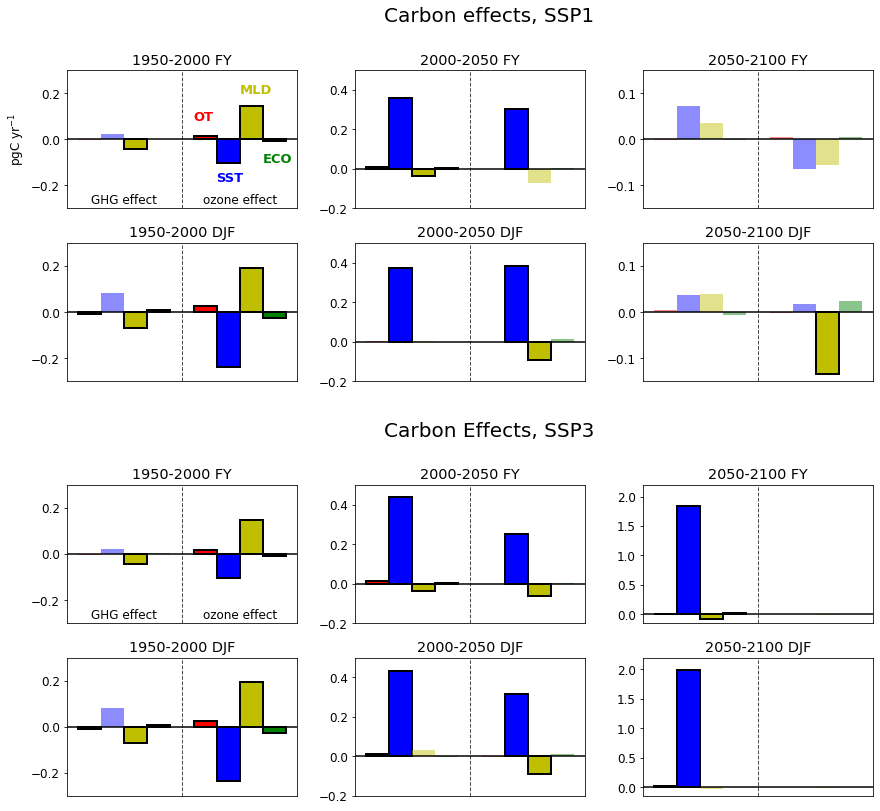

In [136]:
output_str = './data/BOE-OUTPUT-bio-MEDUSA-fer-MEDUSA-cchem-MEDUSA.nc'
valuedesc = 'biology, iron and kg parameterized, carbon data from MEDUSA'
tssp = 'ssp1'; 
fnam_str = f'./figs/BOE-FIG-bio-MEDUSA-fer-MEDUSA-cchem-MEDUSA-MF.jpg'
make_boe_summary_graph_bothssp_slide(output_str, fnam_str, tssp, valuedesc, True)

0
1
2
3
4
5
6
7
8
9
10
11
saved figure at ./figs/BOE-FIG-bio-MEDUSA-fer-GEOTRACES-cchem-MEDUSA-MF.jpg


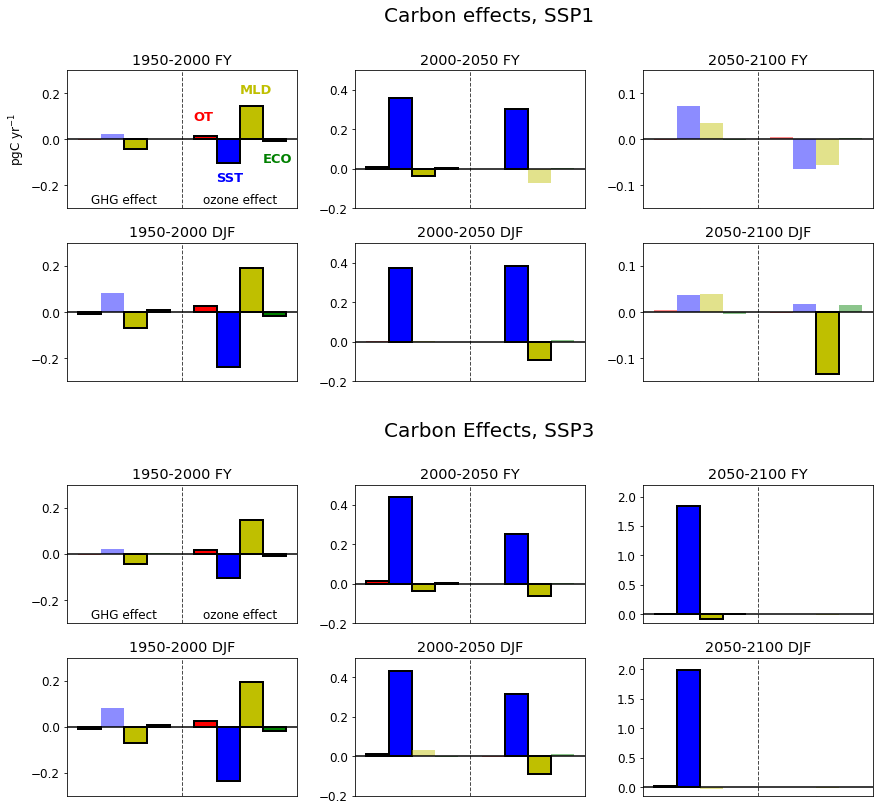

In [137]:
output_str = './data/BOE-OUTPUT-bio-MEDUSA-fer-GEOTRACES-cchem-MEDUSA.nc'
valuedesc = 'biology, iron and kg parameterized, carbon data from MEDUSA'
tssp = 'ssp1'; 
fnam_str = f'./figs/BOE-FIG-bio-MEDUSA-fer-GEOTRACES-cchem-MEDUSA-MF.jpg'
make_boe_summary_graph_bothssp_slide(output_str, fnam_str, tssp, valuedesc, True)

In [138]:
input_str = xr.open_dataset('./data/BOE-INPUT-bio-MEDUSA-fer-GEOTRACES-cchem-MEDUSA.nc')
input_str2 = xr.open_dataset('./data/BOE-INPUT-bio-MEDUSA-fer-MEDUSA-cchem-MEDUSA.nc')


In [140]:
input_str2

<xarray.Dataset>
Dimensions:            (period: 3, scenario: 2, season: 5)
Coordinates:
  * period             (period) object '1950-2000' '2000-2050' '2050-2100'
  * season             (season) object 'FY' 'DJF' 'MAM' 'JJA' 'SON'
  * scenario           (scenario) object 'ssp1' 'ssp3'
Data variables: (12/13)
    grad_dFedz         (period, season, scenario) float64 ...
    grad_dFev          (period, season, scenario) float64 ...
    mu_L               (period, season, scenario) float64 ...
    dmudFe             (period, season, scenario) float64 ...
    diatconc           (period, season, scenario) float64 ...
    mn_kg              (period, season, scenario) float64 ...
    ...                 ...
    mn_Revfact         (period, season, scenario) float64 ...
    mn_DIC             (period, season, scenario) float64 ...
    mn_TA              (period, season, scenario) float64 ...
    mn_pCO2            (period, season, scenario) float64 ...
    grad_dDICdz        (period, season, scenario) float64 ...
    grad_DIC_surfdeep  (period, season, scenario) float64 ...
Attributes:
    made in:  BOE-SO-carbon/make-input-nc-for-BOEcalc.ipynb
    desc: